# <center>Численное решение СЛУ. Численное интегрирование</center>
### Задание: найти решение системы для 1000, 10000 уравнений с точностью $\epsilon = 0.001$


<div align=" justify "><big>Задана система уравнений:   </big></div>


<center>\begin{cases}{x_1=1  \\}{x_{i-1}-(4+\frac{sin(i)}{i})x_i+x_{i+1}=-4+\int_{0}^{1} \frac{cos(3t)}{(1+10it^2)} dt \\ }{x_n=4}\end{cases}</center>

<big>1. Построим график подынтегральной функции (для 10-го уравнения)</big>

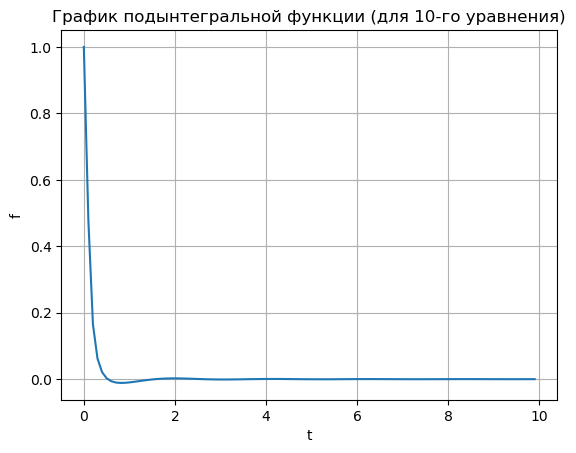

PyObject Text(24,0.5,'f')

In [1]:
#Код.

#Зададим начальные параметры.
t=0 #Координата.
i=10 #Номер уравнения.
mass_f=zeros(100) #Значения оси "y".
mass_t=zeros(100) #Значения оси "x".
f(x)=(cos(3*x))/(1+10*i.*(x.^2)) #Подынтегральное выражение.

#График подинтегральной функции.
for j=1:100
    mass_f[j]=f(t)
    mass_t[j]=t
    t+=0.1
end

#Построение графика.
using PyPlot
plot(mass_t,mass_f)
grid("on")
title("График подынтегральной функции (для 10-го уравнения)")
xlabel("t")
ylabel("f")

<big>2. Необходимо вычислить определенный интеграл. Для этого применим формулу Буля:                                      
    <br />
    <center>$\sum_{k=0}^{4}C_k^{(4)}f(x_k^{(4)}) = \frac{(\beta - \alpha)}{90}(7f(\alpha)+32f(\frac{(3\alpha+\beta)}{4})+12f(\frac{(\alpha+\beta)}{2})+32f(\frac{(\alpha+3\beta)}{4})+7f(\beta))$</center> 
    <br />
В этой формуле неизвестен шаг. Сначала зададим шаг произвольно и построим график зависимости значения интеграла от номера итерации используемого метода численного интегрирования. 
    
</big>

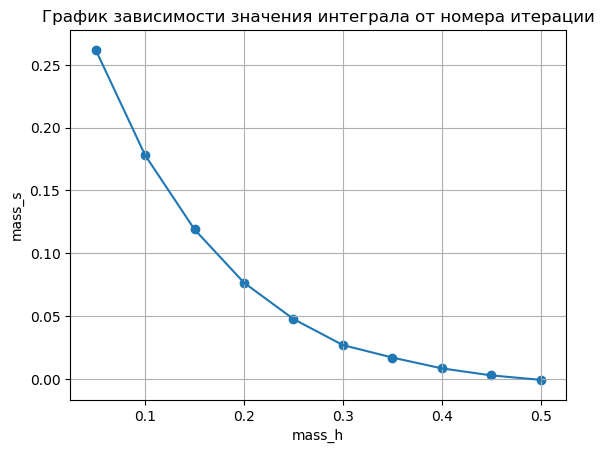

PyObject <matplotlib.collections.PathCollection object at 0x000000002F674C18>

In [3]:
#Код.

#Зададим начальные параметры.
a=0 #alpha.
b=1 #beta.
c=1 #вспомогательная переменная. Верхний предел интегрирования.
E=0.001 #Точность.
s=0 #Значение формулы Буля.
g=0 #Счётчик итераций в цикле с подсчетом s.
h=0 #Шаг.
i=10 #Номер уравнения.
mass_s=[] #Массив со значениями s.
mass_h=[] #Массив со значениями h.
f(x)=(cos(3*x))/(1+10*i.*(x.^2)) #Подынтегральное выражение.

#График значения интеграла от h.
for i=1:10 #Для 10 разных h.
    h+=0.05 #h увеличивается. Каждый следующий на 0.05 больше предыдущего.
    b=a+h #Вычисляем вторую координату отрезка.
    push!(mass_h,h) #Заполняем массив значениями h.
    
    while((!(b>=c))&&g<100) #Первое условие - условие выхода за границы интегрирования. Второе - превышение кол-ва итераций (если вдруг не сработает первое, т.е. для избежания зацикливания).
        b=b+h #Сдвигаем отрезок интегрирования, меняя координаты a(alpha) и b(beta).
        a=a+h
        s+=((b-a)/90)*(7*f(a)+32*f((3*a+b)/4)+12*f((a+b)/2)+32*f((a+b)/4)+7*f(b)) #Вычисляем s с помощью формулы Буля.
        g+=1 #Считаем итерации в цикле while.
    end
    
    b=1 #Возвращаем переменным начальные значения, для подсчета s при другом шаге.
    a=0
    push!(mass_s,s) #Заполняем массив значениями s.
    s=0
end

#Построение графика.
using PyPlot
plot(mass_h,mass_s)
grid("on")
title("График зависимости значения интеграла от номера итерации")
xlabel("mass_h")
ylabel("mass_s")
scatter(mass_h,mass_s)

<big>Теперь будем искать шаг $h = (\alpha-\beta)$ каждую итерацию с помощью квадратурной формулы Буля:
    <br />
    <br />
    <center>$R_4[f]\leq \underset{x\in[\alpha,\:\beta]}{max}\mid f^{(7)}(x)\mid\frac{8(\alpha-\beta)^7}{945}$</center>
    <br />
    Откуда получаем: 
    <center>$h = \mid\frac{(945\epsilon )}{(8pr(0.001))^{1/7}}\mid$ </center>
    <br />
    где pr(0.001) - производная подынтегральной функции в точке 0.001 (максимальное значение производной), которая равна:
    <br />
    <br />
    <center>$pr(t)=9(243sin(3t)+\frac{11340isin(3t)}{(1+10it^2)}+\frac{252000i^2sin(3t)}{(1+10it^2)^2}+\frac{1680000i^3sin(3t)}{(1+10it^2)^3}-\frac{716800000000i^7t^7cos(3t)}{(1+10it^2)^7}-\frac{107520000000i^6t^6sin(3t)}{(1+10it^2)^6}-\frac{4480000000i^5t^3cos(3t)}{(1+10it^2)^5}-\frac{806400000i^4t^3cos(3t)}{(1+10it^2)^4}-\frac{403200000i^4t^2sin(3t)}{(1+10it^2)^4}-\frac{30240000i^3t^2sin(3t)}{(1+10it^2)^3}-\frac{15120000i^3t^3cos(3t)}{(1+10it^2)^3}-\frac{453600i^2t^2sin(3t)}{(1+10it^2)^2}+\frac{11340ixcos(3t)}{(1+10it^2)}+\frac{756000ti^2cos(3t)}{(1+10it^2)^2}+\frac{15120000ti^3cos(3t)}{(1+10it^2)^3}+\frac{44800000ti^4cos(3t)}{(1+10it^2)^4}+\frac{403200000i^4t^4sin(3t)}{(1+10it^2)^4}+\frac{8064000000i^5t^5cos(3t)}{(1+10it^2)^5}+\frac{13440000000i^5t^4sin(3t)}{(1+10it^2)^5}+\frac{107520000000i^6t^5cos(3t)}{(1+10it^2)^6)})/(1+10i(t^2))$</center>
    <br />
    Интегрировать будем в промежутке от 0 до 1. Выберем начальные координаты отрезка: $\alpha = 0,\:\beta = 1$ и будем их изменять по формулам $\beta=\beta+h, \:\alpha=\alpha+h$ (при заходе первый раз в цикл, эти параметры сразу меняются, поэтому главное задать только начальную координату отрезка, т.е. $\alpha$, а $\beta$ можно выбрать произвольным). Сохранять значения интеграла для каждого уравнения будем в массив B.
</big>


In [ ]:
#Код.

#Зададим начальные параметры.
n=10000 #число уравнений
a=0 #alpha
b=1 #beta
c=1 #вспомогательная переменная. Верхний предел интегрирования.
h=0 #Шаг.
pr(x)=9*(243*sin(3*x)+11340*i*sin(3*x)/(1+10*i*x^2)+252000*i^2*sin(3*x)/(1 + 10*i*x^2)^2+1680000*i^3*sin(3*x)/(1+10*i*x^2)^3-716800000000*i^7*x^7*cos(3*x)/(1+10*i*x^2)^7-107520000000*i^6*x^6*sin(3*x)/(1+10*i*x^2)^6-4480000000*i^5*x^3*cos(3*x)/(1+10*i*x^2)^5-806400000*i^4*x^3*cos(3*x)/(1+10*i*x^2)^4-403200000*i^4*x^2*sin(3*x)/(1 + 10*i*x^2)^4 - 30240000*i^3*x^2*sin(3*x)/(1 + 10*i*x^2)^3 - 15120000*i^3*x^3*cos(3*x)/(1 + 10*i*x^2)^3 - 453600*i^2*x^2*sin(3*x)/(1 + 10*i*x^2)^2 + 11340*i*x*cos(3*x)/(1 + 10*i*x^2) + 756000*x*i^2*cos(3*x)/(1 + 10*i*x^2)^2 + 15120000*x*i^3*cos(3*x)/(1 + 10*i*x^2)^3 + 44800000*x*i^4*cos(3*x)/(1 + 10*i*x^2)^4 + 403200000*i^4*x^4*sin(3*x)/(1 + 10*i*x^2)^4 + 8064000000*i^5*x^5*cos(3*x)/(1 + 10*i*x^2)^5 + 13440000000*i^5*x^4*sin(3*x)/(1 + 10*i*x^2)^5 + 107520000000*i^6*x^5*cos(3*x)/(1 + 10*i*x^2)^6)/(1 + 10*i*(x^2)) #7 производная.
f(x)=(cos(3*x))/(1+10*i.*(x.^2)) #Подынтегральное выражение.

for i=2:(n-1) #Внешний цикл для поиска B[i] (по условию ищем от 2 до (n-1)).
    h=abs(((945*E )/(8*pr(0.001)))^(1/7)) #Шаг на каждой итерации обновляется.
    b=a+h #подсчитываем beta.
    while((!(b>=c))&&g<100)
        #"Двигаем" отрезок.
        b=b+h #Изменяем координату beta на соответствующий итерации шаг.
        a=a+h ##Изменяем координату alpha на соответствующий итерации шаг.
        s+=((b-a)/90)*(7*f(a)+32*f((3*a+b)/4)+12*f((a+b)/2)+32*f((a+b)/4)+7*f(b)) #Подсчитываем по формуле Буля s. 
        g+=1 #Счетчик итераций.      
    end
    B[i]=s #Сохраняем значение s в массив.
    #Обнуляем необходимые переменные перед подсчётом значения следующей итерации.
    h=0
    s=0
    a=0
    b=1
    g=0  

end

B-=4 #Вычитаем из каждого элемента массива "4", согласно начальным данным.

<big>3. Реализуем метод последовательной релаксации. Для этого метода нам необходимо составить 3 матрицы: диагональную D, нижнюю треугольную L (в нашем случае она нулевая), верхнюю треугольную R. Стоит заранее оговорится, что начальные условия были не очень хорошими, так как некоторые решения системы уравнений двумя разными способами (с помощью метода релаксации и по определению) получались NaN и Inf. Это связано с плохой обусловленностью матрицы A=L+R+D. Чтобы исправить это, пришлось поменять некоторые начальные условия. После изменения, матрица D заполняется значениями "5", вместо "1". Более никаких изменений не производилось.
</big> 

In [ ]:
#Задаём матрицы
A=zeros(n,n) #A=L+R+D
D=zeros(n,n) #Диагональная матрица
R=zeros(n,n) #Верхняя треугольная матрица
L=zeros(n,n) #Нижняя треугольная матрица

#Заполняем матрицы R и D (L - нулевая, исходя из начальных условий)
for k1=1:n
    for k2=1:n
        if(k1+1==k2)
            R[k1,k2]=-(4+(sin(k2+1))/(k2^2))
        end
        
        if(k1==k2)
            D[k1,k2]=5
        end
        
        if(k1+2==k2)
            R[k1,k2]=1
        end
    end
end

<big> Метод последовательной релаксации - итерационный метод. Итерационными называют приближенные методы,в которых решение системы получается как предел последовательности векторов $\{x^k\}^{\infty}_{k=1}$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальный элемент $x^1$ выбирается произвольно. Последовательность $\{x^k\}^{\infty}_{k=1}$ yназывается итерационной, а её элементы последовательными итерациями (приближениями).
<br />
    Важной характеристикой итерационного процесса является скорость сходимости иетрационной последовательности. Говорят, что иетрация $x^k$ является с точностью $\epsilon$ (в смысле некоторой нормы $\parallel x \parallel$) приближенным решением системы, если: 
    <br />
    <br />
    <center> $\parallel x^k-x^0 \parallel \leq\epsilon$, </center>
    <br />
    где $x^0$ - точное решение системы.
    <br />
    Как парвило, для итерационного метода решения системы существует такая последовательность невырожденных матриц $H_k$, $k=1,2,...$, что правило построения элементов итерационной последовательности записывается в виде: 
    <br />
    <br />
    <center> $x^{k+1}=x^k-H_k(Ax^k-b)$. </center>
    <br />
    Перепишем в виде:
    <br />
    <center> $x^{k+1}=T_kx^k+H_kb$, </center>
    <br />
    где $T_k=E-H_kE$, $E$ - единичная $(n\times n)$ - матрица. Вектор $\varphi^k=x^k-x^0$ называется вектором ошибки, а вектор $r^k=Ax^k-b$ - вектором невязки.
    <br />
    Итерационный метод называется стационарным, если матрица $H_k$ не зависит от номера шага $k$. В противном случае метод называется нестационарным. Для того, чтобы стационарный итерационный процесс 
    <br />
    <br />
    <center> $x^{k+1}=Tx^k+Hb$, </center>
    <br />
    сходился, достаточно, чтобы для какой-либо одной нормы матрицы $T$ выполнялось неравенство:
    <br />
    <br />
    <center> $\parallel T \parallel < 1$. </center>
    <br />
    Критерием окончания итерационного процесса при заданной точности $\epsilon$ может служить неравенство:
    <br />
    <br />
    <center> $\parallel x^k - x^{k-1}\parallel\leq\epsilon\frac{1-\parallel T\parallel}{\parallel T\parallel}$. </center>
    <br />
    Метод последовательной релаксации - стационарный метод. В нём применяется процесс ускорения сходимости. Ускорение достигается введением так называемого ускоряющего множителя $\tau$. Такое введение заключается в незначительной линейной экстраполяции с коэффициентом $\tau$, применяемой к каждой неизвестной $x_i$ на каждой итерации по формуле:
    <br />
    <br />
    <center> $\bar{x}^{k+1}_i=x^k_i+\tau(x^{k+1}_i-x^k_i)$, </center>
    <br />
    где $x^{k+1}_i$ - последнее значение $x_i$ полученное без ускорения, а $\bar{x}^{k+1}_i$ - ускоренное значение $x_i$. Оптимальное значение параметра $\tau$ заключено в пределах от 0 до 2. Это значение выбирается (подбирается) произвольно.
    <br />
    Матрица $H_k$ и $T_k$ определяются следующим образом:
    <br />
    <br />
    <center> $H_k=\tau(D+\tau L)^{-1}, \ \ T_k=(D+\tau L)^{-1}((1-\tau)D-\tau R)$, </center>
    <br />
    Итерационный процесс имеет вид:
    <br />
    <br />
    <center> $x^{k+1}=(D+\tau L)^{-1}((1-\tau)D-\tau R)x^k+\tau(D+\tau L)^{-1}b$. </center>
    <br />
    Или короче:
    <br />
    <center> $x^{k+1}=T_kx^k+H_kb$. </center>
    <br />
    В этом методе $H_k$ и $T_k$ считаются один раз, так как метод стационарный и $\tau = const$.
    <br />
    Условие выхода из цикла будет:
    <br />
    <br />
    <center> $\parallel x^k-x^0 \parallel \leq\epsilon$, </center>
    <br />
    так как метод стационарный.
    <br />
    </big>

In [ ]:
Tk=zeros(n,n) #Задаем матрицу Tk.
tk=0.8 #Произвольно задаем ускоряющий множитель.
mass_x1=zeros(100000) #Задаем массив для подсчета нормы x, чтобы в дальнейшем построить график.
norm_x1=0 #Вспомогательный массив, для подсчета нормы x. 
x=zeros(n) #Задаём массив, в который будем добавлять решения x. 
x1=zeros(n) #Вспомогательный массив для подсчета нормы x.
E=0.001 #Точность.
i=1 #Переменная для подсчета итераций, а также для заполнения массива с нормами.
x[1]=1. #Значение первого x (начальные условия).
x[n]=4. #Значение крайнего x (начальные условия).
norm_x=1 #Норма x, необходима в условии цикла.

Hk=tk*inv(D+tk*L) #Считаем матрицу Hk (её считаем один раз, вне цикла).
Tk=(inv(D+tk*L))*((1-tk)*D-R*tk) #Считаем матрицу Tk (её считаем один раз, вне цикла).

while((i<100000)&&(abs(norm_x)>E)) #Цикл для поиска x.
    norm_x=0 #Обнуляем переменные.
    norm_x1=0  
    x1=x #Обновляем вспомогательный массив с учетом предыдущего x.
    x=Tk*x+Hk*B #Считаем новый x.
   
    #Необходимые действия для последующего подсчета норм.
    for j=1:n 
        norm_x+=(x[j]-x1[j])^2
        norm_x1+=(x[j])^2
    end
    
    mass_x1[i]=sqrt(norm_x1) #Считаем норму x.

    norm_x=sqrt(norm_x) #Считаем норму для условия внешнего (основного) цикла.
    i+=1 #Счётчик итераций.
end

<big>Были построены графики: <br /> 1) Зависимость решения $x$ от итераций:
</big>  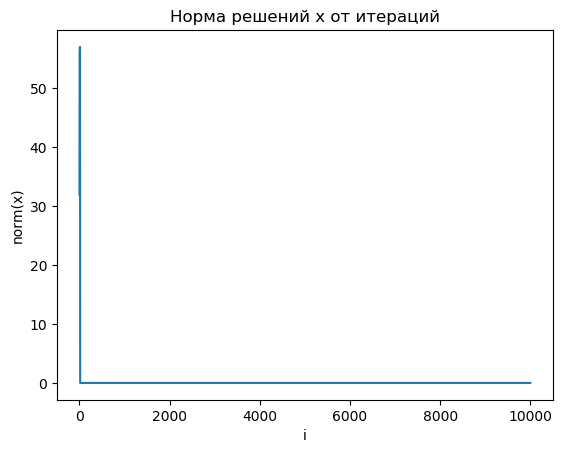

<big>2) Нормы решений $x$ от итераций:
</big> 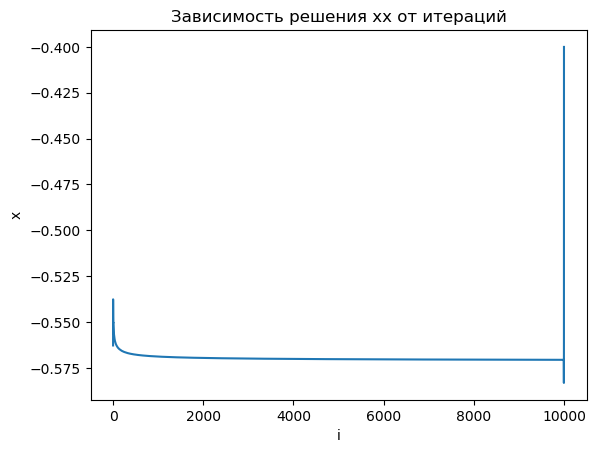

<big> Решение системы с помощью базовой библиотеки Julia.</big>

In [170]:
AA=zeros(n,n) #Задаём обратную матрицу.
yy=zeros(n) #Решение системы.

A=D+L+R #Считаем матрицу А.
AA=inv(A) #Заполняем обратную матрицу.
yy=AA*B #Получаем решение систеы.

10000-element Array{Float64,1}:
 -1.92005
 -1.85622
 -1.89009
 -1.92164
 -1.93431
 -1.93207
 -1.92581
 -1.92396
 -1.92815
 -1.93488
 -1.93972
 -1.94092
 -1.93986
  ⋮      
 -1.99707
 -1.99724
 -1.99777
 -1.99904
 -2.00149
 -2.00493
 -2.00643
 -1.99524
 -1.94299
 -1.7899 
 -1.43883
 -0.8    

<big> Сравниваем решения, полученные с помощью метода релаксации и базовой библиотеки Julia. Полученный ответ должен стремится к нулю. </big>

In [172]:
z=(x-yy) #Получаем разность для подсчета нормы.
zz=sqrt(sum(z.^2)) #Считаем норму.
println(zz) #Выводим результат.

0.001893984648091425


### Вывод:
<big> С помощью формул Буля сначала был подсчитан интеграл (матрица B). Затем посчитали всю правую часть уравнения. В процессе выполнения задания, столкнулись с проблемой, связанной с обусловленностью матрицей A=L+D+R. Решения, получаемые по определению и с помощью метода получались Inf и NaN. В результате была изменена диагональная матрица D, чтобы исправить плохую обусловленность матрицы A. В целом, метод рабочий. Норма разности решений стремится к нулю. </big>

